# In this program ...

- We will conduct a simple linear regressional model
- Then, we will test the accuracy using R2 score
- You also will learn how to imput your missing data within a dataframe using mean method.


### Import Libraries

In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline

# Convert CSV to DataFrame


- lets turn our CSV file into a pandas DataFrame 



In [176]:
Data = pd.read_csv ("COVID.csv")

C:\Users\Hossein Toreyhi\AppData\Local\Temp\ipykernel_13160\2992395251.py:1: DtypeWarning: Columns (5,7,9,10,12,13,14,15,16,17,18,19,20,24,25,26,32,33,36,37,41,44,45,48,49,50,52,53,54,56,57,58,59,61,63,64,65,70,71,72,73,76,78,79,81,83,84,85,86,87,88,90,93,94,95,96,97,98,99,100,102,103,104,105,106,107,108,109,110,113,114,116,117,119,120,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,153,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,193,194,195,196,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,279,280,281,282,283,284,285,287,288,289,290,291,292,293,295,296,297,298,299,300,301,30

# Let's see what we got

- see what is going on here



In [177]:
Data.head ()

,Patient_Number,Patient_Phase,Patient_Hospital,Patient_AdmitDate,Patient_DischargeDate,Patient_C19Variant,Outcome_InhospitalMortality,Outcome_LOS,Outcome_ICUadmission,Outcome_ICULOS,...,LAB_TotalProtein_First,LAB_TSH_First,LAB_T4_First,LAB_T3_First,LAB_VitD3_First,LAB_Zinc_y_First,LAB_IgM_First,LAB_IgG_First,LAB_SARSCOV2Egene_First,LAB_SARSCOV2RDRP_First
0,1,Phase 2,Hospital1,1400/05/21,NaN,Delta,Died,30,1,25,...,NaN,NaN,NaN,NaN,11.2,NaN,NaN,NaN,Positive,Positive CT:28.5
1,2,Phase 2,Hospital1,1400/05/29,NaN,Delta,Died,19,1,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Positive,Positive CT:18.0
2,3,Phase 2,Hospital1,1400/06/17,NaN,Delta,Died,12,1,11,...,NaN,NaN,NaN,NaN,39.9,NaN,NaN,NaN,NaN,NaN
3,4,Phase 2,Hospital1,1400/02/04,NaN,NaN,Survived,18,1,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Positive,Positive CT:20.9
4,5,Phase 2,Hospital1,1400/02/04,NaN,NaN,Survived,18,1,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Positive,Positive CT:20.9


<Axes: >

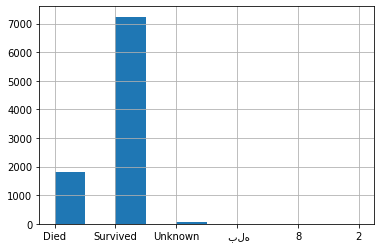

In [178]:
Data ["Outcome_InhospitalMortality"].hist()

<Figure size 720x432 with 0 Axes>

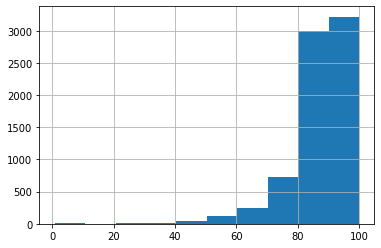

<Figure size 720x432 with 0 Axes>

In [179]:
Data ["VS_O2satwithoutsupp"].hist()
plt.figure(figsize=(10, 6))

In [180]:
Data["VS_O2satwithoutsupp"]=Data["VS_O2satwithoutsupp"].astype(float)

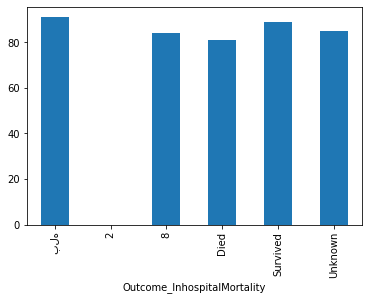

In [181]:
O2sat = Data.groupby("Outcome_InhospitalMortality")["VS_O2satwithoutsupp"].mean ()
O2sat.plot(kind="bar")
plt.show()


In [182]:
msk = np.random.rand (len (Data)) < 0.8
train = Data [msk]
test = Data [~msk]

## train imutation

- let's imoute missing values with mean

In [183]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')

imp.fit(train [["VS_diastolic BP","VS_Systolic BP"]])
train[["VS_diastolic BP", "VS_Systolic BP"]] = imp.transform(train[["VS_diastolic BP", "VS_Systolic BP"]])


C:\Users\Hossein Toreyhi\AppData\Local\Temp\ipykernel_13160\1885526783.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[["VS_diastolic BP", "VS_Systolic BP"]] = imp.transform(train[["VS_diastolic BP", "VS_Systolic BP"]])


# Chek if there is any missing value or not

In [184]:
columns_to_check = ["VS_diastolic BP","VS_Systolic BP"]
missing_values = train [columns_to_check].isnull().any()
print(missing_values)

VS_diastolic BP    False
VS_Systolic BP     False
dtype: bool


# Linear regression model

- We wanna find the coefficient and intercept
- parameters : SBP and DBP


In [185]:
from sklearn import linear_model

regr = linear_model.LinearRegression ()

train_x = np.asanyarray (train [["VS_diastolic BP"]])

train_y = np.asanyarray (train [["VS_Systolic BP"]])

regr.fit (train_x, train_y)

print (regr.coef_)

print (regr.intercept_) 


[[1.09203313]]
[38.31958972]


# Draw plot

- lets draw scatter plot along with linear regressional model

Text(0, 0.5, 'SBP')

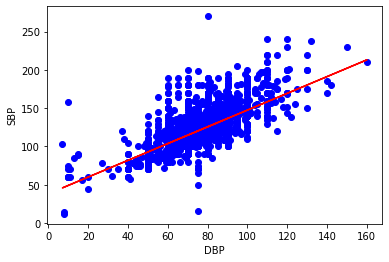

In [186]:
plt.scatter (x = train [["VS_diastolic BP"]], y = train ["VS_Systolic BP"], color = "blue")
plt.plot (train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], "-r")
plt.xlabel ("DBP")
plt.ylabel ("SBP")

## test imputation

- I should imput all columns before splitting


In [187]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')

imp.fit(test [["VS_diastolic BP","VS_Systolic BP"]])
test[["VS_diastolic BP", "VS_Systolic BP"]] = imp.transform(test[["VS_diastolic BP", "VS_Systolic BP"]])

C:\Users\Hossein Toreyhi\AppData\Local\Temp\ipykernel_13160\3243426542.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[["VS_diastolic BP", "VS_Systolic BP"]] = imp.transform(test[["VS_diastolic BP", "VS_Systolic BP"]])


# Let's Test model 

- we are going to find MAE, MSW and R2 score
- if you don't know what are these, read your notes again


In [188]:
from sklearn.metrics import r2_score

test_x = np.asanyarray (test [["VS_diastolic BP"]])
test_y = np.asanyarray (test [["VS_Systolic BP"]])
test_y_ = regr.predict (test_x)

print ("MAE = %.2f " % np.mean (np.absolute (test_y_ - test_y)))
print ("MSE = %.2f " % np.mean ((test_y_ - test_y)**2))
print ("R2 score = %.2f" % r2_score (test_y , test_y_))

MAE = 8.57 
MSE = 166.49 
R2 score = 0.46


Text(0, 0.5, 'SBP')

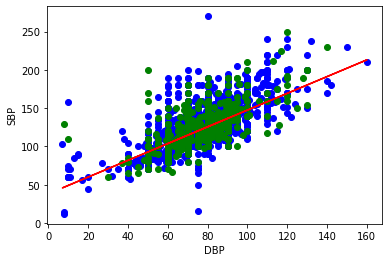

In [189]:
plt.scatter (x = train [["VS_diastolic BP"]], y = train ["VS_Systolic BP"], color = "blue")
plt.scatter (x = test [["VS_diastolic BP"]], y = test ["VS_Systolic BP"], color = "green")
plt.plot (train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], "-r")
plt.xlabel ("DBP")
plt.ylabel ("SBP")